In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.datasets import load_digits

# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

import os

In [2]:
file_dir = os.chdir(r'C:\Users\johnh\Dropbox\Edureka\machine_learning_certification\Class5')

1. **We shall use the same dataset used in previous assignment - digits. Make a 80-20 train/test split.**
<p>[Hint: Explore datasets module from scikit learn]</p>


_"This dataset is made up of 1797 8x8 images. Each image, like the one shown below, is of a hand-written digit. In order to utilize an 8x8 figure like this, we’d have to first transform it into a feature vector with length 64."_

Dataset details can be found here: https://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html 

The original dataset can be found here: 
[ICU Machine Learnig Repository](https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits)


In [3]:
digits = load_digits()

In [4]:
# digits

In [5]:
digits.images.shape

(1797, 8, 8)

In [6]:
# digitsdf

In [7]:
y = digits.target
X = digits.images #.reshape(len(digits.images), -1)
# X = digits.images

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state = 85)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1437, 8, 8)
(360, 8, 8)
(1437,)
(360,)


In [9]:
# Reshaping is needed in order for our model to work
X_train_reshaped, X_test_reshaped = X_train.reshape(len(X_train), -1), X_test.reshape(len(X_test), -1)

Run a logistic regression to have a baseline to compare our regression to.

In [10]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_reshaped, y_train)

LogisticRegression(max_iter=2000)

In [11]:
predictions = lr.predict(X_test_reshaped)

In [12]:
acc = accuracy_score(y_test, predictions)
print("Model accuracy is: ", "{:.2%}".format(acc))

Model accuracy is:  96.39%


This regressions works really well even though I have NOT scaled neither the train nor the test data.

2. **Using scikit learn perform a LDA on the dataset. Find out the number of components in the projected subspace.**
<p>[Hint: Refer to discriminant analysis module of scikit learn]</p>

In [13]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_reshaped)
X_test_scaled = sc.transform(X_test_reshaped)

In [14]:
lda = LDA(solver = 'svd', n_components = None)
X_train_pca = lda.fit_transform(X_train_scaled, y_train)
X_test_pca = lda.transform(X_test_scaled)

In [15]:
lda.explained_variance_ratio_

array([0.28320613, 0.18471045, 0.17107444, 0.1164807 , 0.08508005,
       0.0661443 , 0.04231829, 0.02929119, 0.02169443])

In [16]:
np.sum(lda.explained_variance_ratio_[:8])

0.9783055660211735

In [17]:
var_ratios = lda.explained_variance_ratio_[:8]

In [18]:
ld_values = np.arange(len(lda.explained_variance_ratio_[:8]))
ld_values

array([0, 1, 2, 3, 4, 5, 6, 7])

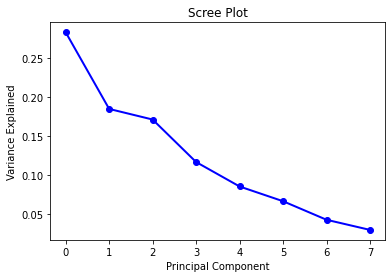

In [19]:
plt.plot(ld_values, var_ratios, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

Text(0.5, 1.0, 'Explained Variance')

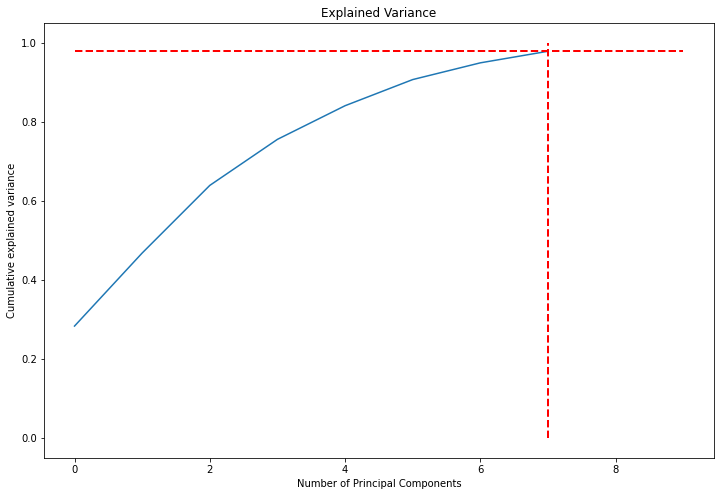

In [20]:
fig, ax = plt.subplots(figsize= (12,8))

ax.plot(np.cumsum(lda.explained_variance_ratio_[:8]))
ax.hlines(y = 0.9783055660211735, xmin= 0, xmax= len(lda.explained_variance_ratio_), linewidth=2, color='r', linestyle = '--')
ax.vlines(x = 7, ymin= 0, ymax= 1, linewidth=2, color='r', linestyle = '--')
ax.set_xlabel('Number of Principal Components')
ax.set_ylabel('Cumulative explained variance')
ax.set_title('Explained Variance')


In [21]:
lda = LDA(solver = 'svd', n_components=9)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

In [22]:
lda.explained_variance_ratio_

array([0.28320613, 0.18471045, 0.17107444, 0.1164807 , 0.08508005,
       0.0661443 , 0.04231829, 0.02929119, 0.02169443])

In [23]:
print('Percentage explained with {} principal components: '.format(len(lda.explained_variance_ratio_)), "{:.2%}".format(sum(lda.explained_variance_ratio_)))

Percentage explained with 9 principal components:  100.00%


3. **Transform the dataset and fit a logistic regression and observe the accuracy. Compare it with the previous model based on PCA in terms of accuracy and model complexity.**
<p>[Hint: Project both the train and test samples to the new subspace]</p>

In [24]:
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr.fit(X_train_lda, y_train)

LogisticRegression(max_iter=2000)

In [25]:
predictions_new = lr.predict(X_test_lda)

In [26]:
acc_new = accuracy_score(y_test, predictions_new)

In [27]:
print("Model accuracy is: ", "{:.2%}".format(acc_new))

Model accuracy is:  96.94%


The model **INCREASED** the accuracy with only 9 components instead of the original 64.  This is a reduction in features of 82.8%

In [28]:
conf_matrix = confusion_matrix(y_test, predictions_new)
conf_matrix

array([[35,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 44,  1,  0,  1,  0,  0,  0,  0,  1],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  2,  0],
       [ 0,  1,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 34,  0,  1],
       [ 0,  2,  0,  0,  0,  1,  0,  0, 21,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 26]], dtype=int64)

In [29]:
print('Micro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='micro')))
print('Micro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='micro')))
print('Micro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='micro')))

print('Macro Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='macro')))
print('Macro Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='macro')))
print('Macro F1-score: {:.2%}\n'.format(f1_score(y_test, predictions_new, average='macro')))

print('Weighted Precision: {:.2%}'.format(precision_score(y_test, predictions_new, average='weighted')))
print('Weighted Recall: {:.2%}'.format(recall_score(y_test, predictions_new, average='weighted')))
print('Weighted F1-score: {:.2%}'.format(f1_score(y_test, predictions_new, average='weighted')))

Micro Precision: 96.94%
Micro Recall: 96.94%
Micro F1-score: 96.94%

Macro Precision: 96.72%
Macro Recall: 96.81%
Macro F1-score: 96.74%

Weighted Precision: 96.97%
Weighted Recall: 96.94%
Weighted F1-score: 96.93%


In [30]:
class_rep = classification_report(y_test, predictions_new, output_dict= True)
                                
classification_report_ = pd.DataFrame(class_rep).T

classification_report_

,precision,recall,f1-score,support
0,1.000000,1.000000,1.000000,35.000000
1,0.936170,0.936170,0.936170,47.000000
2,0.970588,1.000000,0.985075,33.000000
3,1.000000,0.951220,0.975000,41.000000
4,0.976190,0.976190,0.976190,42.000000
5,0.970588,0.970588,0.970588,34.000000
6,0.977273,1.000000,0.988506,43.000000
7,1.000000,0.971429,0.985507,35.000000
8,0.913043,0.875000,0.893617,24.000000
9,0.928571,1.000000,0.962963,26.000000


In [31]:
comparison_df = pd.DataFrame({'original_value': y_test, 'predicted_value': predictions_new})
comparison_df['match'] = comparison_df['original_value'] == comparison_df['predicted_value'] 
comparison_df.head()

,original_value,predicted_value,match
0,4,4,True
1,3,3,True
2,9,9,True
3,6,6,True
4,7,7,True


In [32]:
wrong_preds = comparison_df.loc[comparison_df['match'] == False]
print(wrong_preds.shape)
display(wrong_preds)

(11, 3)


,original_value,predicted_value,match
17,4,1,False
60,1,9,False
77,3,8,False
81,8,1,False
134,7,9,False
139,3,8,False
153,5,6,False
203,8,1,False
206,8,5,False
220,1,2,False


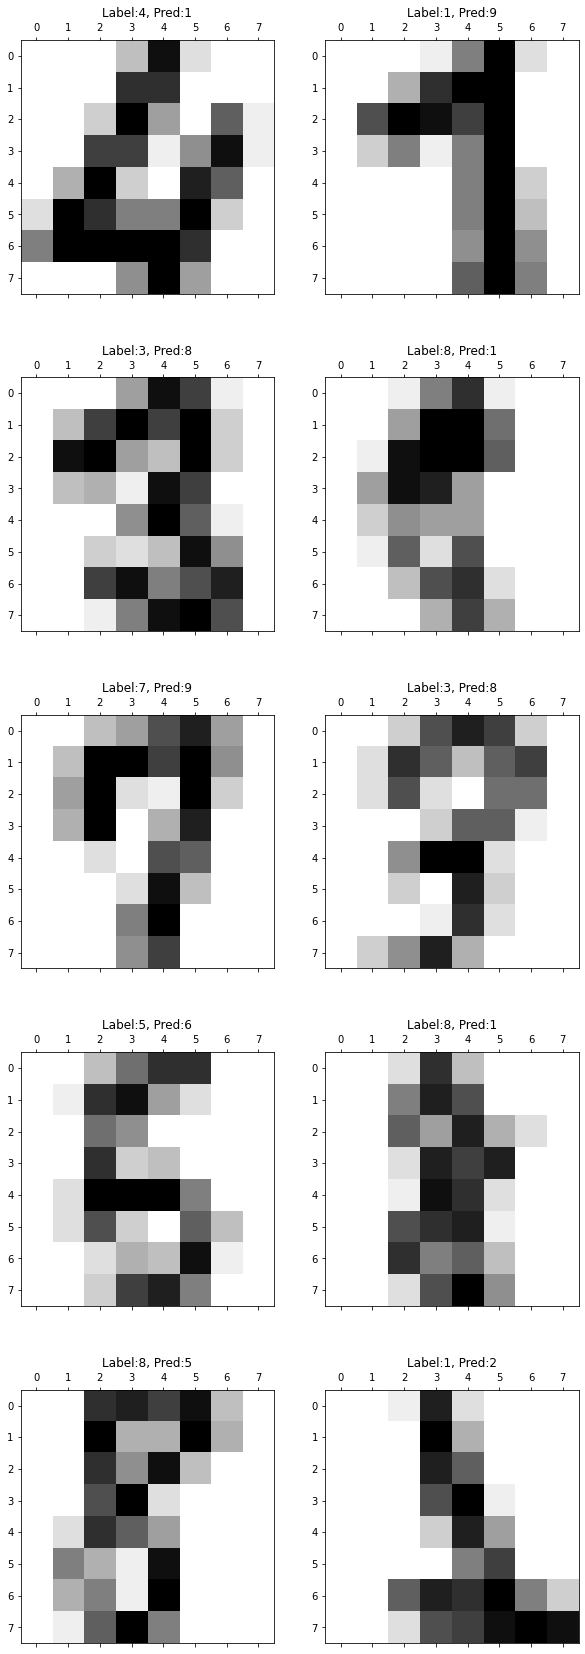

In [33]:
wrong_idxs = list(wrong_preds.index)

_, axes = plt.subplots(nrows= 5, ncols= 2, figsize= (10, 30))

for ax, num in zip(axes.flatten(), wrong_idxs):
    
    #print(num)
    original_val = wrong_preds.iloc[wrong_preds.index == num, 0].values[0]
    predicted_val = wrong_preds.iloc[wrong_preds.index == num, 1].values[0]

    ax.matshow(X_test[num], cmap=plt.cm.gray_r)
    ax.set_title('Label:{}, Pred:{}'.format(original_val, predicted_val))